<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/cheetah_and_leapord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
from google.colab import files

In [4]:
files.upload()

Saving leapord.csv to leapord.csv


{'leapord.csv': b'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTArQArzzag45_5S6VuioqxRsain31mSY3UKpf-rOu35-al0zBe\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTFs513s_Wcy5keNbD58s1uQ210_US4rElFc-fnly5si7bJ8Fh\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSlVT6_OIfpkDBwtpDDAk0UubKuTZxZXfHlp-nwsL9JHmEi2Rrk\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR84DKvVH-KgT9xRKtoXz-K16KBZ3r5SHtflKMNgk-_xfm2eBJQ\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTPnesuvW8kJwyW2lVygHfjkcYd2TD6HBK3u1ST_4OTDwYt5zK1\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQaml4hI5tXPkJf8pYFHa1kl0vHFtlgZOvsGFpC1IHlCXka2yHA\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRhhKNTDPEbWOTMLlbpvEbLdTUQ1A6G0S_x3o11suhitS82df-Z\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRXciO4K9n86KueMPCrY7UERbO50ifYmX8Z_Fvs-KGVklVCmB_5\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTa_UeWbBxhOg4CGmjOYHySPDI3CZLdYAyF5hHDvVPrP9c5eJ4N\nhttps://en

In [5]:
ls

cheetah.csv  leapord.csv  sample_data/


In [0]:
pwd

'/content'

In [0]:
path = Path('/content/data/animals')

In [7]:
ls

cheetah.csv  leapord.csv  sample_data/


In [0]:
cheetah_file = 'cheetah.csv'
leapord_file = 'leapord.csv'

In [0]:
path.mkdir(parents=True, exist_ok=True)

In [0]:
!cp cheetah.csv data/animals/cheetah.csv
!cp leapord.csv data/animals/leapord.csv

In [11]:
(path/'cheetah').mkdir(parents = True, exist_ok = True)
(path/'leapord').mkdir(parents = True, exist_ok = True)
path.ls()

[PosixPath('/content/data/animals/cheetah'),
 PosixPath('/content/data/animals/leapord'),
 PosixPath('/content/data/animals/leapord.csv'),
 PosixPath('/content/data/animals/cheetah.csv')]

In [12]:
classes = ['cheetah', 'leapord']
download_images(path/'cheetah.csv', path/'cheetah', max_pics=20)

In [13]:
download_images(path/'leapord.csv', path/'leapord', max_pics = 20)

In [14]:
print(len((path/'cheetah').ls()))
print(len((path/'leapord').ls()))

20
20


In [15]:
doc(verify_images)

In [16]:
for c in classes:
  print(c)
  verify_images(path/c, delete= True, max_size=500)

cheetah


leapord


In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2, ds_tfms = get_transforms(), size = 224, bs = 4).normalize(imagenet_stats)
data_1 = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.4, ds_tfms = get_transforms(), size = 224, bs = 4).normalize(imagenet_stats)

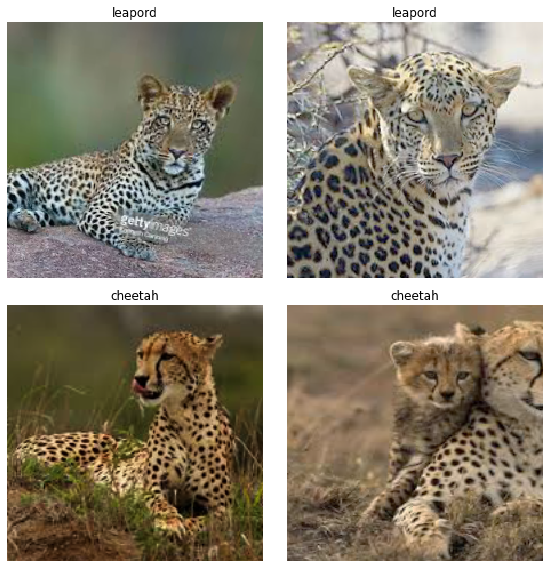

In [19]:
data.show_batch(rows = 3, fig_size = (6, 7))

In [20]:
data.c, data.classes

(2, ['cheetah', 'leapord'])

In [21]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [22]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.035651,0.383632,0.250000,00:01
1,0.551940,0.134795,0.000000,00:00


In [0]:
learn.save('stage_1')

In [0]:
(path/'test_cheetah').mkdir(parents = True, exist_ok = True)
(path/'test_leapord').mkdir(parents = True, exist_ok = True)

In [33]:
download_images(path/'cheetah.csv', path/'test_cheetah', max_pics = 100)
download_images(path/'leapord.csv', path/'test_leapord', max_pics = 100)

In [0]:
#test the data in the learn
cs = get_image_files(path/'test_cheetah')
ls = get_image_files(path/'test_leapord')

In [35]:
len(cs), len(ls)

(100, 100)

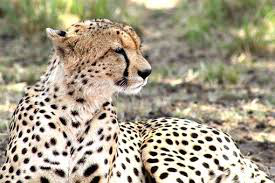

In [36]:
img = open_image(cs[60])
img

In [46]:
pred_class,pred_idx,outputs = learn.predict(img)
str(pred_class)

'cheetah'

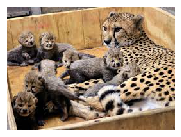

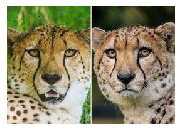

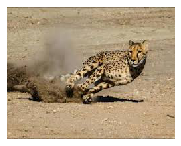

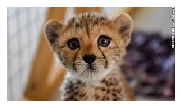

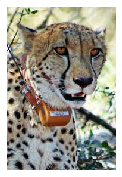

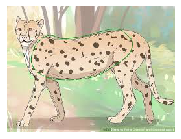

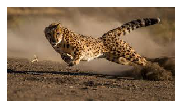

In [48]:
for i in cs:
  img = open_image(i)
  pred_class,pred_idx,outputs = learn.predict(img)
  if str(pred_class) != 'cheetah':
    img.show()

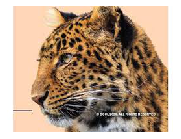

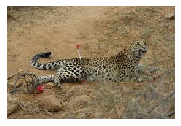

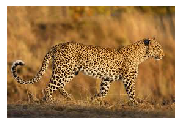

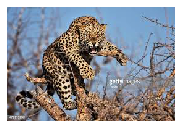

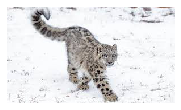

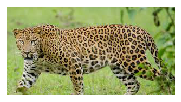

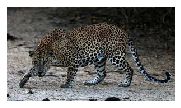

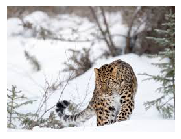

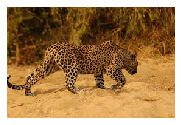

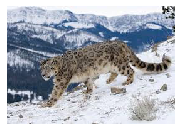

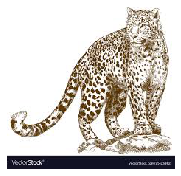

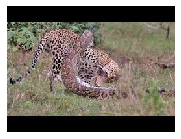

In [49]:
for i in ls:
  img = open_image(i)
  pred_class,pred_idx,outputs = learn.predict(img)
  if str(pred_class) != 'leapord':
    img.show()

In [0]:
learn_1 = cnn_learner(data_1, models.resnet34, metrics = error_rate)

In [0]:
learn_1.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.288353,4.422774,0.537500,00:01
1,1.459406,1.645525,0.387500,00:01
2,1.103670,0.642907,0.212500,00:01
3,0.870937,0.388265,0.112500,00:01


In [0]:
learn_1.save('stage_1_1')

In [0]:
learn_1.unfreeze()
learn_1.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.227048,0.344822,0.112500,00:02
1,0.147346,0.035067,0.012500,00:01
2,0.115952,0.027790,0.000000,00:01


In [0]:
learn_1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


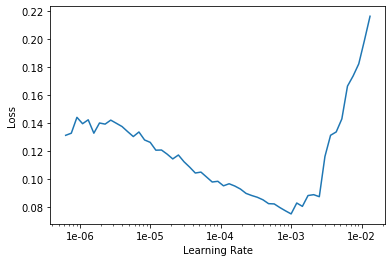

In [0]:
learn_1.recorder.plot()